In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("Notes_de_la_vie.csv", decimal=',')
data

,Alessandro,Sami,Pierre,Jean-Philippe,Téo,Tristan,Quentin,Margaux,Carla,Antoine,Dylann
0,3.000,7,4,1.00000,6.0,7.0,9.5,5.0,9.5,6.0,7.0
1,7.200,5,7,4.00000,5.0,9.0,9.0,6.5,7.2,4.0,4.7
2,5.900,7,4,0.87500,3.5,5.0,10.0,7.5,7.0,2.0,4.0
3,8.800,7,7,6.76456,5.5,8.0,10.0,10.0,9.0,6.0,4.0
4,8.000,4,6,7.25000,7.0,9.0,8.0,6.0,6.0,0.5,6.0
5,6.500,6,7,7.75000,8.0,8.0,9.0,5.0,7.5,5.0,7.0
6,2.000,4,7,8.00000,7.5,8.5,9.0,5.5,9.0,0.4,6.0
7,5.000,3,6,6.87800,9.0,9.0,9.0,5.5,7.5,6.0,8.0
8,7.875,1,6,7.00000,7.5,7.5,8.5,6.0,8.0,4.0,7.0
9,6.100,6,9,8.00000,5.5,6.5,9.0,9.0,9.0,6.0,8.5


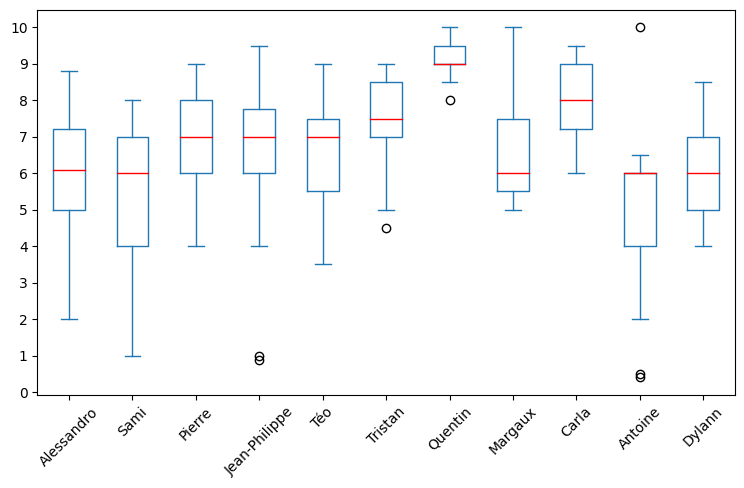

In [25]:
data.plot.box(medianprops=dict(color="red"), figsize=(9, 5))
plt.xticks(rotation=45)
plt.yticks(np.arange(0, 11))
plt.show()

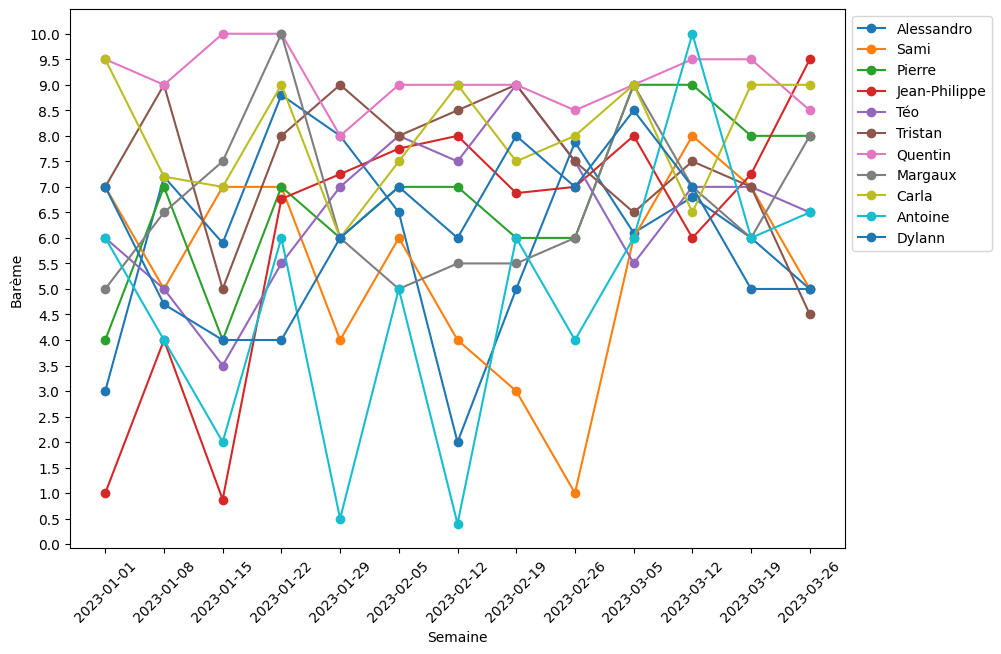

In [26]:
ax = data.plot(marker='o', figsize=(10, 7))
plt.legend(loc='best', bbox_to_anchor=(1,1))
plt.ylabel('Barème')
plt.xlabel('Semaine')
plt.yticks(np.arange(0, 10.5, 0.5))
plt.xticks(np.arange(0, 13), rotation=45)

from datetime import date, timedelta

startDate = date(2023, 1, 1) # Début de l'expérience

dates = [(startDate + timedelta(n)) for n in range(0, 7*13, 7)]

ax.set_xticklabels(dates)

plt.show()

In [27]:
description = data.describe()
description.loc["std"].sort_values(ascending=False).to_csv("chaos.csv", float_format='%.3f')

In [28]:
description.transpose().sort_values(by=['std'], ascending=False)

,count,mean,std,min,25%,50%,75%,max
Antoine,13.0,4.800000,2.647955,0.400,4.0,6.0,6.00,10.0
Jean-Philippe,13.0,6.174428,2.640439,0.875,6.0,7.0,7.75,9.5
Sami,13.0,5.384615,1.980676,1.000,4.0,6.0,7.00,8.0
Alessandro,13.0,6.013462,1.930096,2.000,5.0,6.1,7.20,8.8
Pierre,13.0,6.769231,1.589227,4.000,6.0,7.0,8.00,9.0
Margaux,13.0,6.692308,1.548366,5.000,5.5,6.0,7.50,10.0
Dylann,13.0,6.092308,1.467118,4.000,5.0,6.0,7.00,8.5
Tristan,13.0,7.423077,1.441153,4.500,7.0,7.5,8.50,9.0
Téo,13.0,6.538462,1.435583,3.500,5.5,7.0,7.50,9.0
Carla,13.0,8.015385,1.141524,6.000,7.2,8.0,9.00,9.5


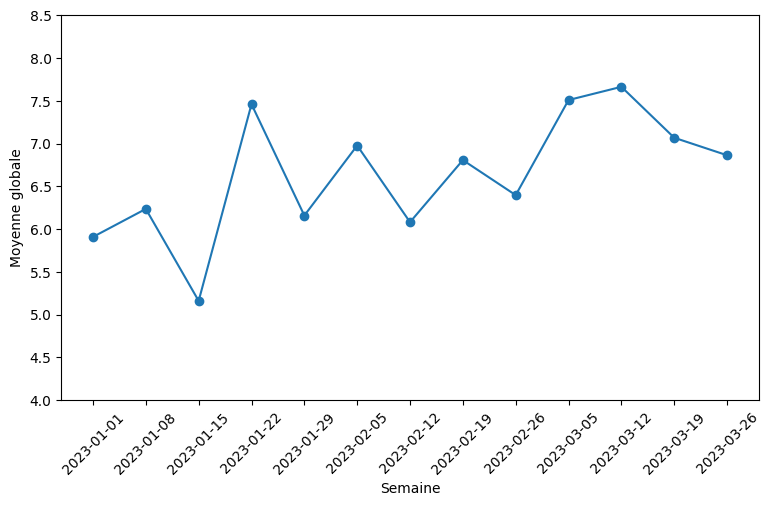

In [29]:
ax = data.transpose().describe().loc["mean"].plot(marker='o', figsize=(9, 5))
plt.ylabel('Moyenne globale')
plt.xlabel('Semaine')
plt.yticks(np.arange(4, 9, 0.5))
plt.xticks(np.arange(0, 13), rotation=45)

ax.set_xticklabels(dates)

plt.show()

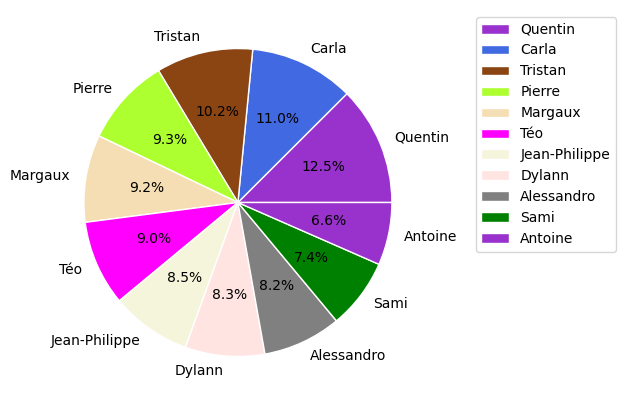

In [30]:
scores = pd.DataFrame(data.sum().sort_values(ascending=False), columns=['Score /130'])
scores['Score %'] = [round(scores['Score /130'][i] / 130 * 100, 2) for i in range(len(scores))]
scores.to_csv("classement.csv")

import matplotlib.colors as mpl_colors
from random import choice

ncolors = list(mpl_colors.CSS4_COLORS)
colors = [choice(ncolors) for _ in range(11)]

scores.plot.pie(y='Score /130', autopct='%1.1f%%', colors=colors, wedgeprops={"linewidth": 1, "edgecolor": "white"}, figsize=(9, 5))
plt.legend(loc='best', bbox_to_anchor=(1.1,1))
plt.ylabel("")

plt.show()

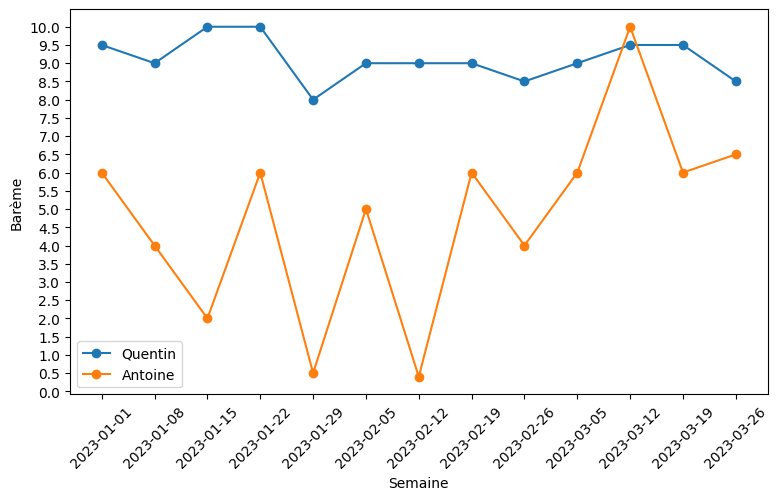

In [31]:
ax = data[["Quentin", "Antoine"]].plot(marker='o', figsize=(9, 5))
plt.ylabel('Barème')
plt.xlabel('Semaine')
plt.yticks(np.arange(0, 10.5, 0.5))
plt.xticks(np.arange(0, 13), rotation=45)

ax.set_xticklabels(dates)
plt.show()

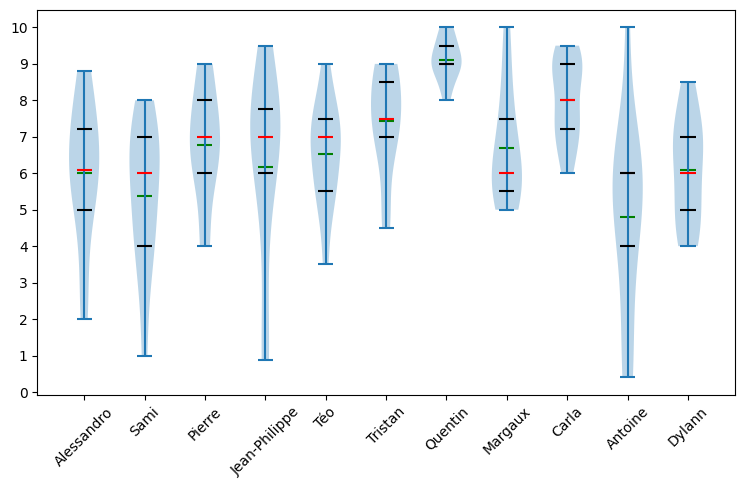

In [32]:
fig, ax = plt.subplots(figsize=(9, 5))
violin_parts = plt.violinplot(data, showmeans=True, showextrema=True, showmedians=True, quantiles=[[0.25, 0.75] for _ in range(11)])

means = violin_parts['cmeans']
medians = violin_parts['cmedians']
quantiles = violin_parts['cquantiles']

means.set_colors('green')
medians.set_color('red')
quantiles.set_color('black')

plt.xticks(np.arange(1,12), labels=data.columns, rotation=45)
plt.yticks(np.arange(0, 11))
plt.show()

In [33]:
data.stack().describe()

count    143.000000
mean       6.638060
std        2.060333
min        0.400000
25%        5.700000
50%        7.000000
75%        8.000000
max       10.000000
dtype: float64